In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!{sys.executable} -m pip install PyAthena

    100% |████████████████████████████████| 61kB 25.6MB/s ta 0:00:01
    100% |████████████████████████████████| 829kB 24.4MB/s ta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from pyathena import connect

In [3]:
conn = connect(s3_staging_dir ='s3://trc4200-database/queries/', region_name='us-east-1')

In [4]:
# @note the following dataset only comprises instances from February
fcu_south_data = pd.read_sql('SELECT CAST(RecordTimeStamp AS TIMESTAMP) As timestamp, '
                        'FCU_01_SaTmp, FCU_01_ZnTmp, '
                        'FCU_02_SaTmp, FCU_02_ZnTmp, '
                        'FCU_04_SaTmp, FCU_04_ZnTmp, '
                        'FCU_06_SaTmp, FCU_06_ZnTmp, '
                        'FCU_07_SaTmp, FCU_07_ZnTmp, '
                        'FCU_08_SaTmp, FCU_08_ZnTmp, '
                        'FCU_09_SaTmp, FCU_09_ZnTmp '
                        'FROM "ltb_database_athena"."fcu_south_cleaned_data" '
                        'WHERE date(RecordTimeStamp) BETWEEN date('+"'2020-01-31'"+') AND date('+"'2020-02-29'"+');'
                        ,conn)

In [5]:
# @note the following dataset only comprises instances from February
fcu_north_data = pd.read_sql('SELECT CAST(RecordTimeStamp AS TIMESTAMP) As timestamp, '
                        'FCU_15_SaTmp, FCU_15_ZnTmp, '
                        'FCU_16_SaTmp, FCU_16_ZnTmp, '
                        'FCU_21_SaTmp, FCU_21_ZnTmp, '
                        'FCU_22_SaTmp, FCU_22_ZnTmp, '
                        'FCU_23_SaTmp, FCU_23_ZnTmp, '
                        'FCU_24_SaTmp, FCU_24_ZnTmp, '
                        'OaTemp, OaRH '
                        'FROM "ltb_database_athena"."fcu_north_cleaned_data" '
                        'WHERE date(RecordTimeStamp) BETWEEN date('+"'2020-01-31'"+') AND date('+"'2020-02-29'"+');'
                        ,conn)

In [52]:
# @note the following dataset only comprises instances from February
ahu_data = pd.read_sql('SELECT CAST(RecordTimeStamp AS TIMESTAMP) As timestamp, '
                        'AHU_01_Peri_SaTmp, AHU_01_Peri_ZnTmp, '
                        'AHU_01_Inter_SaTmp, AHU_01_Inter_ZnTmp, '
                        'AHU_01_SaTmp, AHU_01_ZnTmp, '
                        'AHU_B1_01_SaTmp, AHU_B1_01_ZnTmp_1, '
                        'AHU_B1_01_ZnTmp_2, AHU_B1_02_SaTmp, '
                        'AHU_B1_02_ZnTmp_1, AHU_B1_02_ZnTmp_2, '
                        'OaTemp, OaRH '
                        'FROM "ltb_database_athena"."acu_cleaned_data" '
                        'WHERE date(RecordTimeStamp) BETWEEN date('+"'2020-01-31'"+') AND date('+"'2020-02-29'"+');'
                        ,conn)

In [7]:
# @note the following dataset has been cleaned to include only rooms of interest: Rooms with observable cooling units.
room_data = pd.read_sql('SELECT * FROM "ltb_database_athena"."ltb_room_dataset";', conn)

In [5]:
# @note the wifi dataset only comprises instances from February
wifi_data = pd.read_sql('SELECT hour(RecordTimeStamp) As timestamp, '
                        'AVG(devices_connected) As average_devices_per_hour '
                        'FROM "ltb_database_athena"."wifi_cleaned_data" '
                        'GROUP BY hour(RecordTimeStamp), date_add('+"'hour'"+', 0, date_diff('+"'hour'"+'));'
                        ,conn)

DatabaseError: Execution failed on sql: SELECT hour(RecordTimeStamp) As timestamp, AVG(devices_connected) As average_devices_per_hour FROM "ltb_database_athena"."wifi_cleaned_data" GROUP BY hour(RecordTimeStamp), date_add('hour', 0, DATEDIFF('hour'));
SYNTAX_ERROR: line 1:194: Function datediff not registered
unable to rollback

In [53]:
# Sanity Checks of the dataset
fcu_data = pd.merge(fcu_south_data, fcu_north_data, on="timestamp")
ahu_fcu_data_merged = pd.merge(ahu_data, fcu_data, on="timestamp")
ahu_fcu_data_merged

,timestamp,AHU_01_Peri_SaTmp,AHU_01_Peri_ZnTmp,AHU_01_Inter_SaTmp,AHU_01_Inter_ZnTmp,AHU_01_SaTmp,AHU_01_ZnTmp,AHU_B1_01_SaTmp,AHU_B1_01_ZnTmp_1,AHU_B1_01_ZnTmp_2,...,FCU_21_SaTmp,FCU_21_ZnTmp,FCU_22_SaTmp,FCU_22_ZnTmp,FCU_23_SaTmp,FCU_23_ZnTmp,FCU_24_SaTmp,FCU_24_ZnTmp,OaTemp_y,OaRH_y
0,2020-02-29 23:55:00,20.07,21.04,19.64,21.04,20.10,21.72,22.70,19.56,22.50,...,22.44,23.57,21.42,23.04,22.72,22.54,22.85,23.45,14.56,84.76
1,2020-02-29 23:50:00,20.10,21.07,19.67,21.07,20.10,21.75,22.73,19.56,22.50,...,22.47,23.60,21.45,23.05,22.73,22.55,22.86,23.45,14.64,84.38
2,2020-02-29 23:45:00,20.10,21.07,19.70,21.07,20.13,21.75,22.73,19.59,22.50,...,22.49,23.62,21.47,23.06,22.73,22.57,22.87,23.46,14.67,84.35
3,2020-02-29 23:40:00,20.13,21.07,19.70,21.07,20.13,21.75,22.73,19.62,22.50,...,22.52,23.65,21.50,23.08,22.74,22.59,22.88,23.47,14.69,84.46
4,2020-02-29 23:35:00,20.13,21.10,19.72,21.10,20.13,21.78,22.76,19.65,22.50,...,22.54,23.68,21.52,23.09,22.74,22.61,22.88,23.48,14.67,84.43
5,2020-02-29 23:30:00,20.16,21.10,19.72,21.10,20.16,21.78,22.76,19.65,22.50,...,22.57,23.71,21.56,23.10,22.75,22.63,22.89,23.49,14.72,84.22
6,2020-02-29 23:25:00,20.16,21.13,19.75,21.10,20.16,21.78,22.76,19.67,22.50,...,22.60,23.74,21.58,23.12,22.75,22.65,22.89,23.50,14.75,84.16
7,2020-02-29 23:20:00,20.16,21.13,19.75,21.13,20.19,21.81,22.81,19.70,22.50,...,22.63,23.76,21.61,23.13,22.76,22.66,22.90,23.51,14.69,84.41
8,2020-02-29 23:15:00,20.18,21.13,19.78,21.13,20.19,21.81,22.81,19.70,22.50,...,22.66,23.80,21.64,23.15,22.76,22.68,22.90,23.52,14.75,84.30
9,2020-02-29 23:10:00,20.18,21.15,19.78,21.13,20.19,21.81,22.81,19.70,22.50,...,22.69,23.83,21.67,23.16,22.77,22.71,22.91,23.53,14.80,84.11


In [59]:
def getTempRoom(current_room_unit, time_frame):
    current_room_unit = current_room_unit.replace('-', '_')
    if 'AHU_B1' in current_room_unit:
        temp_idx = current_room_unit + '_ZnTmp_1'
    else:
        temp_idx = current_room_unit + '_ZnTmp'
    ahu_fcu_sample = ahu_fcu_data_merged.resample(str(time_frame)+'min', on='timestamp').first()
    temp = ahu_fcu_sample[inner_temp_idx]
    temp_diff_month = outer_temp - inner_temp
    return temp_diff_month

In [172]:
for index, room in room_data.iterrows():
    test = energyLossRoom(room)
    print(test)
    break

timestamp
2020-02-02 01:00:00    -451.428412
2020-02-02 01:15:00    -472.263570
2020-02-02 01:30:00    -534.769042
2020-02-02 01:45:00    -673.670092
2020-02-02 02:00:00    -729.230513
2020-02-02 02:15:00    -791.735985
2020-02-02 02:30:00    -812.571142
2020-02-02 02:45:00    -812.571143
2020-02-02 03:00:00    -812.571143
2020-02-02 03:15:00    -805.626090
2020-02-02 03:30:00    -784.790932
2020-02-02 03:45:00    -750.065670
2020-02-02 04:00:00    -708.395355
2020-02-02 04:15:00    -666.725040
2020-02-02 04:30:00    -590.329463
2020-02-02 04:45:00    -527.823990
2020-02-02 05:00:00    -465.318517
2020-02-02 05:15:00    -430.593255
2020-02-02 05:30:00    -395.867993
2020-02-02 05:45:00    -277.802100
2020-02-02 06:00:00    -312.527362
2020-02-02 06:15:00    -375.032835
2020-02-02 06:30:00    -354.197678
2020-02-02 06:45:00    -354.197678
2020-02-02 07:00:00    -291.692205
2020-02-02 07:15:00    -250.021890
2020-02-02 07:30:00     -76.395577
2020-02-02 07:45:00     -55.560420
2020-02-02

In [57]:
# @param room_dimen_list a panda dataframe object frame.
# @param time_step integer value of the number of minutes between each temperature reading.
# @param room_height float value for the height of the wall with respect to the room ceiling.
# @param Cp dry air specific heat constant (J*g/K)
# @param rho density of air
# Output is in kiloJoules.
# Assumptions: wall height is approx. one storey which is 3.3m, windows are installed using coated insulating glass
def energyLossRoom(room, time_step=15, room_height=3.3, Cp=1.00, rho=1275):
    room_height = room_height
    coeff_air = Cp
    time_frame = time_step
    room_area = room[2]
    if room[3] == 0:
        return 0
    wall_area = room[3]*room_height
    current_room_unit = room[1]
    temp_list = getTempRoom(current_room_unit, time_frame)
    return (temp_list)*coeff_air*rho*room_area/1000

In [60]:
energy_loss_dict = {}
for _, current_room in room_data.iterrows():
    energy_loss = energyLossRoom(current_room)
    energy_loss_dict[current_room[0]] = energy_loss
energy_loss_df = pd.DataFrame(data=energy_loss_dict)

In [61]:
energy_loss_df

,G31,G01,G02,G03,G21,G23,G81,G54,G55,G56,G57,G58,G60,G61,G62
timestamp,,,,,,,,,,,,,,,
2020-02-02 01:00:00,-451.428412,-391.50405,-83.282745,235.865437,0,0,1796.089950,0,-1449.263175,-321.422910,-244.673520,-235.92600,-142.712535,-94.911000,42.924915
2020-02-02 01:15:00,-472.263570,-397.71840,-83.282745,232.802250,0,0,1819.722712,0,-1410.093900,-321.422910,-238.119765,-234.87744,-142.712535,-93.724613,41.624160
2020-02-02 01:30:00,-534.769042,-401.44701,-84.408187,232.802250,0,0,1890.621000,0,-1335.545925,-321.422910,-235.935180,-234.87744,-152.306655,-94.911000,42.924915
2020-02-02 01:45:00,-673.670092,-408.90423,-88.909958,229.739062,0,0,1953.641700,0,-1243.308600,-322.649715,-244.673520,-234.87744,-151.107390,-93.724612,35.120385
2020-02-02 02:00:00,-729.230513,-421.33293,-97.913497,223.612687,0,0,2048.172750,0,-1181.395875,-323.876520,-251.227275,-239.07168,-135.516945,-92.538225,18.210570
2020-02-02 02:15:00,-791.735985,-432.51876,-112.544250,226.675875,0,0,2087.560687,0,-1140.963075,-328.783740,-256.688738,-244.31448,-124.723560,-93.724612,16.909815
2020-02-02 02:30:00,-812.571142,-443.70459,-127.175002,229.739062,0,0,2087.560687,0,-1248.362700,-334.917765,-266.519370,-250.60584,-137.915475,-97.283775,19.511325
2020-02-02 02:45:00,-812.571143,-454.89042,-137.303985,232.802250,0,0,2111.193450,0,-1348.181175,-339.824985,-278.534588,-254.80008,-140.314005,-99.656550,26.015100
2020-02-02 03:00:00,-812.571143,-345.51786,-70.902877,232.802250,0,0,2087.560688,0,-1455.580800,-342.278595,-267.611662,-256.89720,-116.328705,-100.842937,28.616610


In [42]:
energy_loss_df.index.name

'timestamp'

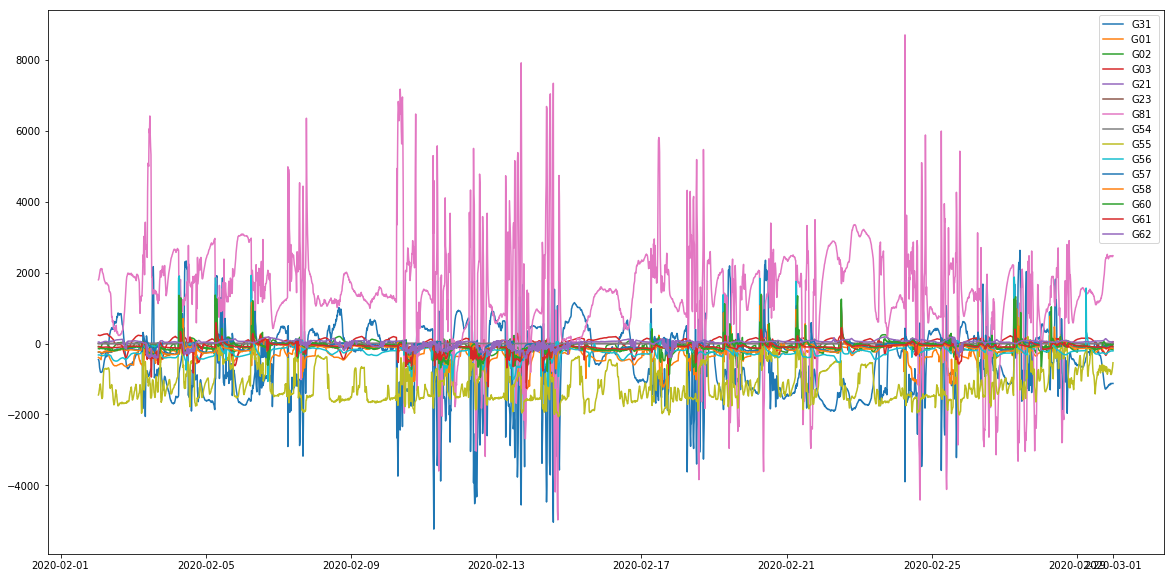

In [62]:
fig= plt.figure(figsize=(20,10))
ax = plt.gca()
for col in energy_loss_df.columns:
    ax.plot(energy_loss_df.index.values, energy_loss_df[col])
    ax.legend()
plt.show()